# logistic regression

In [1]:
#one of linear models, so computationally scalable to big data, compared to models like KNN or random forest.
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import warnings
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
my_df = pd.read_csv("/home/megha/WM/twitter_Web_Mining/final_data/iphone_final_14may.csv",index_col=0)
#my_df_test  = pd.read_csv("/home/megha/WM/twitter_Web_Mining/final_data/samsung_test_final_14may.csv",index_col=0)



In [4]:
print(my_df.shape)


(21627, 10)


In [5]:
my_df.head()

,date,text_original,permalink,text_preprocessed,polarity,polarity_confidence,subjectivity,subjectivity_confidence,polarityNum,brand
id,,,,,,,,,,
948570515085713408,2018-01-03 16:03,It's 10 AM and my iPhone 7 battery is already ...,https://twitter.com/TheScottBeach/status/94857...,s iphone battery already minute phone call tol...,negative,0.894631,subjective,1.0,-1.0,iphone
945970348436094977,2017-12-27 11:51,Apple launched three phones this year: the bez...,https://twitter.com/Today__Tech/status/9459703...,apple launched three phone year bezelbusting i...,positive,0.492551,subjective,1.0,1.0,iphone
951907048035270656,2018-01-12 21:01,Cut one phone completely OFF and my iPhone on ...,https://twitter.com/gods1blessings/status/9519...,cut one phone completely iphone dnd yeah ready...,positive,0.355765,subjective,1.0,1.0,iphone
972090952251670528,2018-03-09 13:45,"Do you think Apple iphone x ""notch"" will be th...",https://twitter.com/puspakpatnaik/status/97209...,think apple iphone x notch trend flagship phon...,neutral,0.577812,subjective,1.0,0.0,iphone
958395849737990144,2018-01-30 18:45,Fluffy Bling iPhone Case All Colors in Stock h...,https://twitter.com/IDMD_MIAMI/status/95839584...,fluffy bling iphone case color stock http shop...,positive,0.501405,subjective,1.0,1.0,iphone


In [7]:
my_df = my_df.drop(['date','text_original','permalink','brand','polarity_confidence','subjectivity','subjectivity_confidence','polarity'],axis=1)
#my_df_test = my_df_test.drop(['date','text_original','permalink','Brand','polarity_confidence','subjectivity','subjectivity_confidence','polarity','Checked'],axis=1)

In [8]:
my_df

,text_preprocessed,polarityNum
id,,
948570515085713408,s iphone battery already minute phone call tol...,-1.0
945970348436094977,apple launched three phone year bezelbusting i...,1.0
951907048035270656,cut one phone completely iphone dnd yeah ready...,1.0
972090952251670528,think apple iphone x notch trend flagship phon...,0.0
958395849737990144,fluffy bling iphone case color stock http shop...,1.0
929188536364027904,applesupport problem icloud recently got newes...,-1.0
947947686514307077,switched iphone camera wait storm year additio...,1.0
967354423273017344,know m s scratch phone make sure update etc th...,-1.0
953630517404012544,bought two iphone november phone bogo rebate s...,0.0


In [9]:
#my_df_test

In [10]:
if(False):
    my_df.insert(2,'target','0')
    my_df.head()

In [11]:
if(False):
    for i in range(0, len(my_df)):
        if  my_df.loc[i]['polarity'] == 'negative':
            my_df.at[i, 'target'] = -1
        elif my_df.loc[i]['polarity'] == 'positive':
            my_df.at[i, 'target'] = 1
        else:
            my_df.at[i, 'target'] = 0

In [12]:
my_df.head()

,text_preprocessed,polarityNum
id,,
948570515085713408,s iphone battery already minute phone call tol...,-1.0
945970348436094977,apple launched three phone year bezelbusting i...,1.0
951907048035270656,cut one phone completely iphone dnd yeah ready...,1.0
972090952251670528,think apple iphone x notch trend flagship phon...,0.0
958395849737990144,fluffy bling iphone case color stock http shop...,1.0


In [13]:
#my_df = my_df[my_df['target'] != -1]


In [14]:
#my_df = my_df.drop(['polarity'], axis=1)


In [15]:
#my_df.head()

In [17]:
my_df['polarityNum'] = my_df['polarityNum'].astype(int)
#my_df_test['polarityNum'] = my_df_test['polarityNum'].astype(int)

In [18]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21627 entries, 0 to 21626
Data columns (total 2 columns):
text_preprocessed    21627 non-null object
polarityNum          21627 non-null int64
dtypes: int64(1), object(1)
memory usage: 338.0+ KB


In [20]:
if(False):
    my_df_test.dropna(inplace=True)
    my_df_test.reset_index(drop=True,inplace=True)
    my_df_test.info()

In [21]:
x_train = my_df.text_preprocessed
y_train = my_df.polarityNum

#my_df_x_test =  my_df_test.text_preprocessed
#my_df_y_test = my_df_test.polarityNum

In [22]:
from sklearn.cross_validation import train_test_split
SEED = 200

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x_train, y_train, test_size=.10, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

#x_validation, x_test, y_validation, y_test = train_test_split(my_df_x_test, my_df_y_test, test_size=.5, random_state=SEED)

In [23]:
x_validation.head()
#y_train.head()

17319                          iphone android acting phone
598      applesupport true iphone compatible honda crvs...
10012    apple happens without government regulation ov...
16232    safe easy use http car walkittalkit simulating...
5861     iphone face scan played grabbed ringing phone ...
Name: text_preprocessed, dtype: object

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from  sklearn.feature_extraction.text import CountVectorizer

In [25]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()   
    
    
    sentiment_fit = pipeline.fit(x_train, y_train)   
    y_pred = sentiment_fit.predict(x_test)
    
    
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test,y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [26]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print((classifier))
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

# TFIDF Vectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [28]:
%%time
print("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 66.98%
accuracy score: 71.51%
model is 4.53% more accurate than null accuracy
train and test time: 0.52s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 66.98%
accuracy score: 72.06%
model is 5.09% more accurate than null accuracy
train and test time: 0.62s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 66.98%
accuracy score: 72.06%
model is 5.09% more accurate than null accuracy
train and test time: 0.53s
--------------------------------------------------------

In [29]:
%%time
print("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 66.98%
accuracy score: 71.69%
model is 4.72% more accurate than null accuracy
train and test time: 1.25s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 66.98%
accuracy score: 71.79%
model is 4.81% more accurate than null accuracy
train and test time: 1.35s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 66.98%
accuracy score: 71.88%
model is 4.90% more accurate than null accuracy
train and test time: 1.32s
---------------------------------------------------------

In [30]:
%%time
print("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 66.98%
accuracy score: 70.68%
model is 3.70% more accurate than null accuracy
train and test time: 2.35s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 66.98%
accuracy score: 72.06%
model is 5.09% more accurate than null accuracy
train and test time: 2.53s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 66.98%
accuracy score: 72.62%
model is 5.64% more accurate than null accuracy
train and test time: 2.43s
--------------------------------------------------------

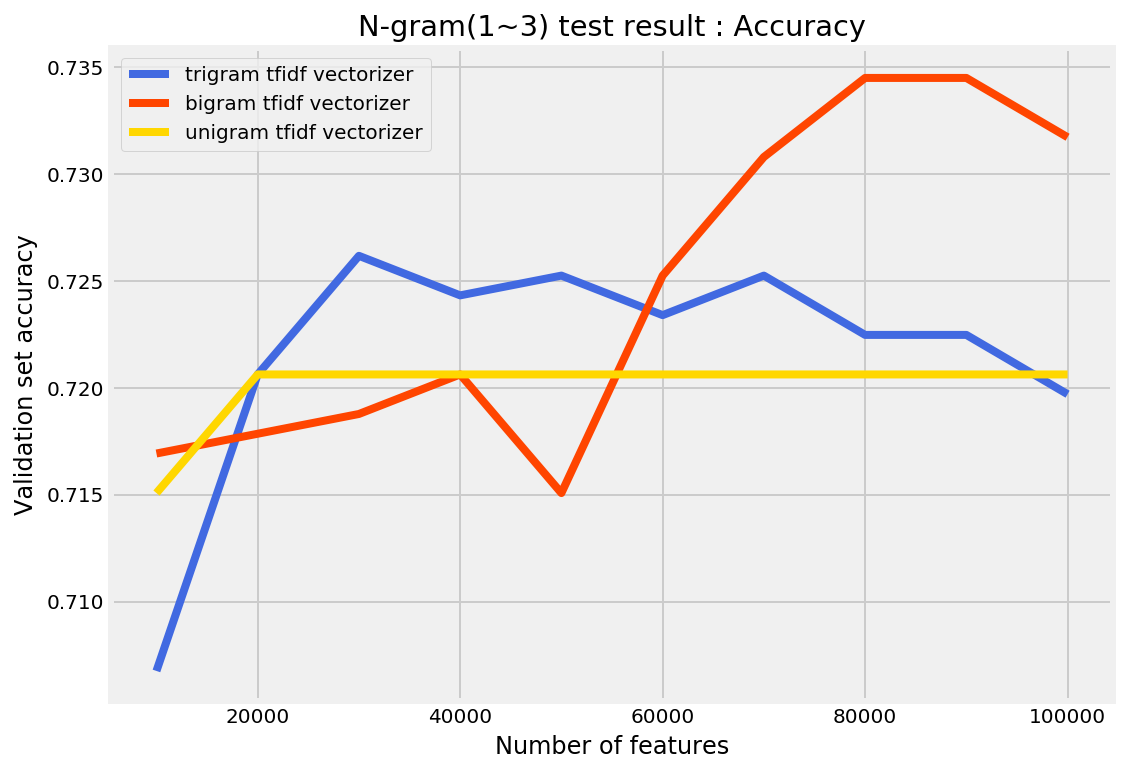

In [31]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
#plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
#plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
#plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()